# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [2]:
## CHANGE THE SIZE FROM 20 TO 1500

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ghadamis
Processing Record 5 of Set 1 | hadibu
Processing Record 6 of Set 1 | togur
Processing Record 7 of Set 1 | sitangkai
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | daulatpur
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | graneros
Processing Record 14 of Set 1 | wad medani
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | pytalovo
Processing Record 17 of Set 1 | christchurch
Processing Record 18 of Set 1 | margate
Processing Record 19 of Set 1 | ola
Processing Record 20 of Set 1 | howrah
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | codrington
Processing Record 23 of

In [5]:
len(city_data)

555

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,4.02,48,0,5.66,IS,1728132093
1,bethel,41.3712,-73.4140,16.48,84,0,0.89,US,1728132094
2,port-aux-francais,-49.3500,70.2167,1.30,93,100,4.63,TF,1728132095
3,ghadamis,30.1337,9.5007,32.65,21,97,4.30,LY,1728132097
4,hadibu,12.6500,54.0333,28.27,74,52,3.14,YE,1728132098


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,4.02,48,0,5.66,IS,1728132093
1,bethel,41.3712,-73.4140,16.48,84,0,0.89,US,1728132094
2,port-aux-francais,-49.3500,70.2167,1.30,93,100,4.63,TF,1728132095
3,ghadamis,30.1337,9.5007,32.65,21,97,4.30,LY,1728132097
4,hadibu,12.6500,54.0333,28.27,74,52,3.14,YE,1728132098


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

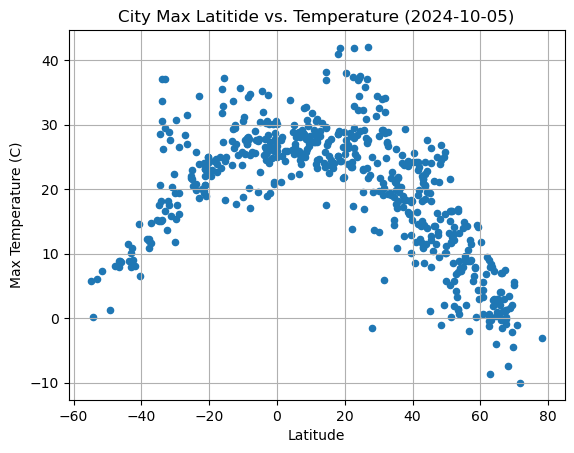

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp')


#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitide vs. Temperature ({Today})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

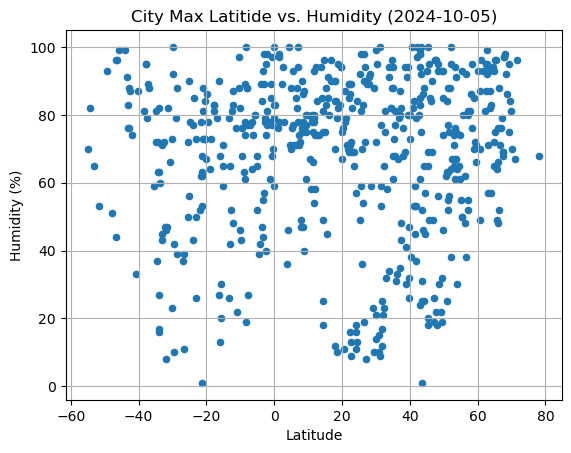

In [11]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot.scatter('Lat','Humidity')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Max Latitide vs. Humidity ({Today})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

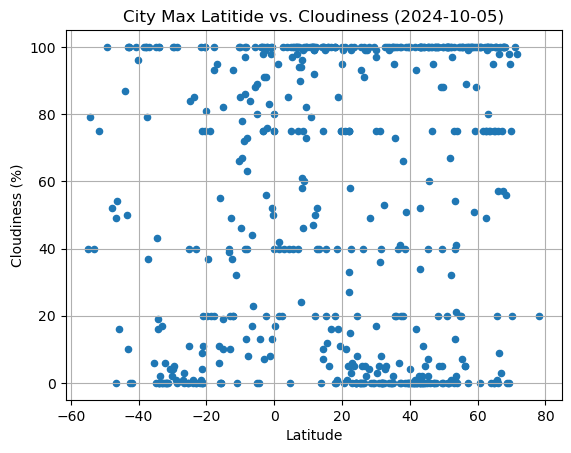

In [12]:
city_data_df.plot.scatter('Lat','Cloudiness')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Max Latitide vs. Cloudiness ({Today})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

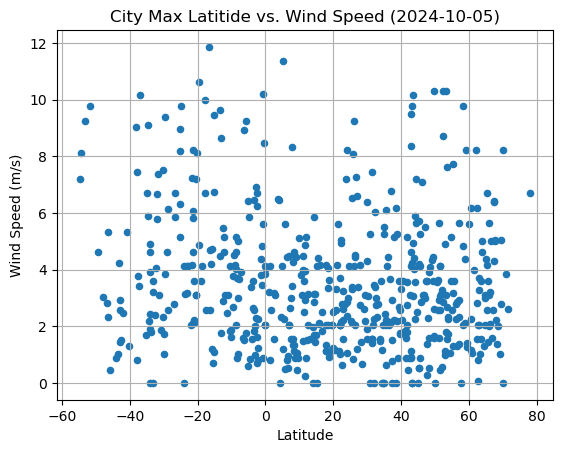

In [13]:
city_data_df.plot.scatter('Lat','Wind Speed')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitide vs. Wind Speed ({Today})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

def regression_plot(dataframe, col1, col2):

    x_axis = dataframe[col1]
    y_axis = dataframe[col2]

    ## calculate slope and intercept of the regression equation

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    #print the r-value

    print(f' The r^value is : {round(rvalue,3)}')

    ### generate the equation to be used as annotation
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    ## generate the regression line plot 

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")

    plt.xlabel(col1)
    plt.ylabel(col2)
    
    ## conditional title

    if min(dataframe['Latitude'])>=0 :
        plt.title(f'{col1} vs. {col2} for Northern Hemisphere')
    else : plt.title(f'{col1} vs. {col2} for Southern Hemisphere')

    ## Conditional Annotation position

    if slope >= 0 :
        x_annot_pos = 0.05
        y_annot_pos = 0.9
    else : x_annot_pos, y_annot_pos = 0.05, 0.1

    plt.annotate(line_eq,(x_annot_pos,y_annot_pos), fontsize=12,color="red", xycoords='axes fraction')

    plt.show()

In [18]:
## rename the columns name

city_data_df = city_data_df.rename(columns={
        'Lat' : 'Latitude',
        'Max Temp' : 'Temperature'
        })
# city_data_df.columns

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude']>0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,4.02,48,0,5.66,IS,1728132093
1,bethel,41.3712,-73.4140,16.48,84,0,0.89,US,1728132094
3,ghadamis,30.1337,9.5007,32.65,21,97,4.30,LY,1728132097
4,hadibu,12.6500,54.0333,28.27,74,52,3.14,YE,1728132098
5,togur,58.3631,82.8265,7.76,76,100,2.04,RU,1728132099


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude']<0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,1.30,93,100,4.63,TF,1728132095
8,edinburgh of the seven seas,-37.0676,-12.3116,11.72,88,100,10.15,SH,1728132102
11,ushuaia,-54.8000,-68.3000,5.81,70,40,7.20,AR,1728131823
12,graneros,-34.0667,-70.7333,15.10,63,0,0.00,CL,1728132106
16,christchurch,-43.5333,172.6333,8.86,91,50,1.03,NZ,1728132046


###  Temperature vs. Latitude Linear Regression Plot

 The r^value is : -0.818


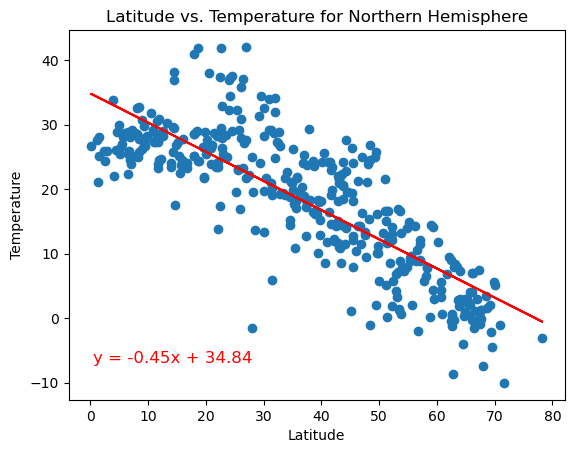

In [21]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df,'Latitude','Temperature')

 The r^value is : 0.701


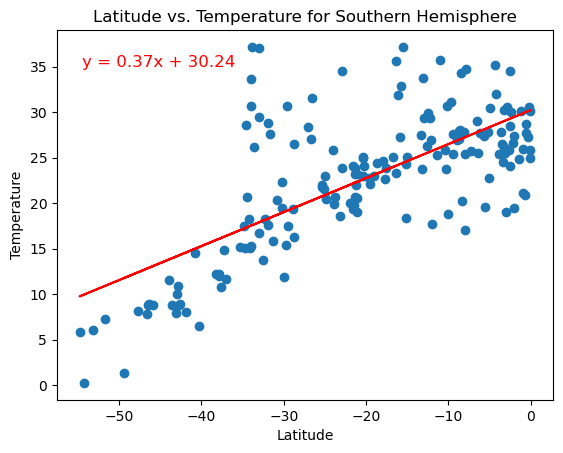

In [22]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
regression_plot(southern_hemi_df,'Latitude','Temperature')

**Discussion about the linear relationship:** 
the correlation between "Latitude" and "Temperature" has an interesting correlation
the r_value is between 0.7 and 0.81 for both hemispheres

Closer we are from the Equator, warmer it is.

### Humidity vs. Latitude Linear Regression Plot

 The r^value is : 0.025


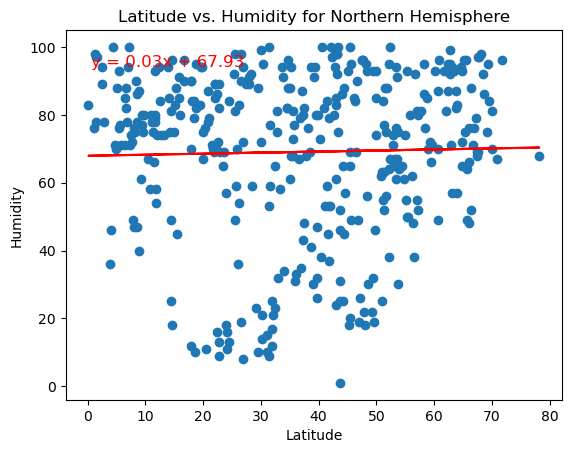

In [23]:
# Northern Hemisphere
regression_plot(northern_hemi_df,'Latitude','Humidity')

 The r^value is : 0.044


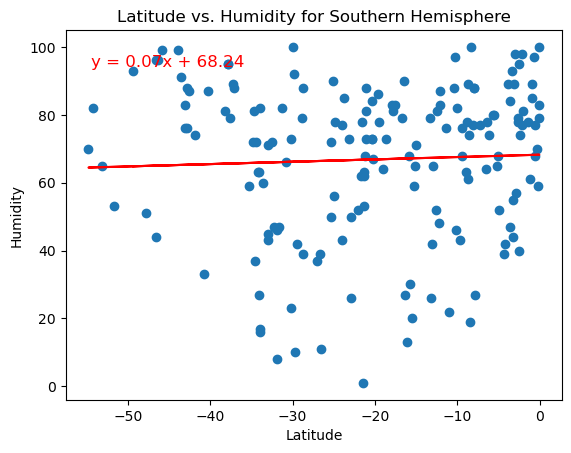

In [24]:
# Southern Hemisphere
regression_plot(southern_hemi_df,'Latitude','Humidity')

**Discussion about the linear relationship:** 
There is no correlation between 'Latitude' and 'Humidity'
the r_value is less than 0.05, and it is abvious regardibg the distribution shown in the scatter-plot
Even if we could think that equtorial cliamate would make the weather more humid, it seems that this is more linked to local geography influence.
this opens opportunities all over the world to have the 'right' temperature

### Cloudiness vs. Latitude Linear Regression Plot

 The r^value is : 0.013


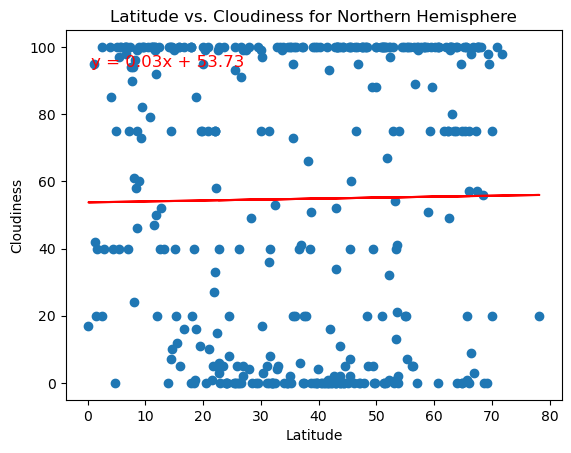

In [25]:
# Northern Hemisphere
regression_plot(northern_hemi_df,'Latitude','Cloudiness')

 The r^value is : 0.186


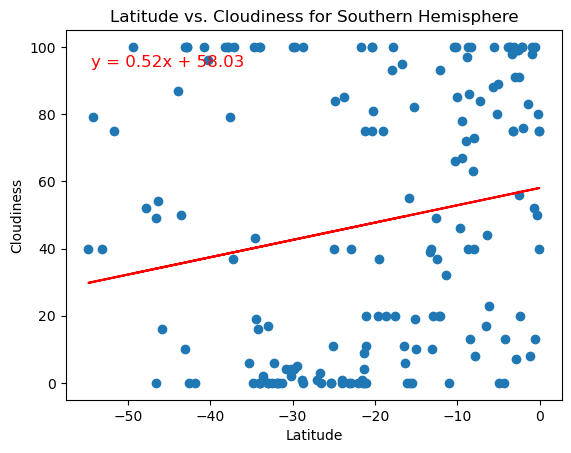

In [26]:
# Southern Hemisphere
regression_plot(southern_hemi_df,'Latitude','Cloudiness')

**Discussion about the linear relationship:** 
There is no correlation between 'Latitude' and 'cloudiness'
the r_value is less than 0.2, with a hagher value for the southern hemisphere comparing to the noth one : 0.19 vs 0.01
but still not significant

this could be explained by the fact that the Southern Hemisphere has less lands so the clouds dont remain in place blocked by montains.

this opens opportunities all over the world to have the 'right' sun exposure

### Wind Speed vs. Latitude Linear Regression Plot

 The r^value is : 0.106


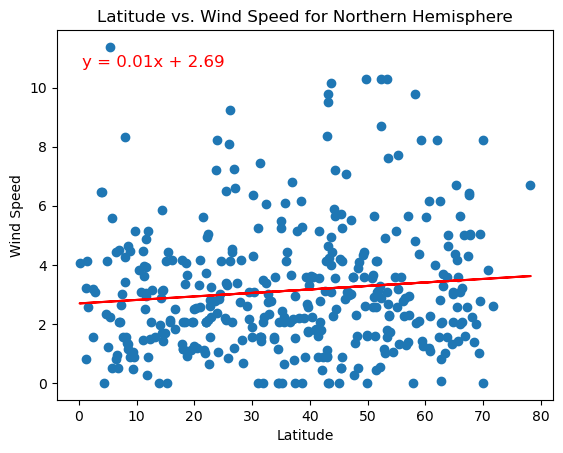

In [27]:
# Northern Hemisphere
regression_plot(northern_hemi_df,'Latitude','Wind Speed')

 The r^value is : -0.09


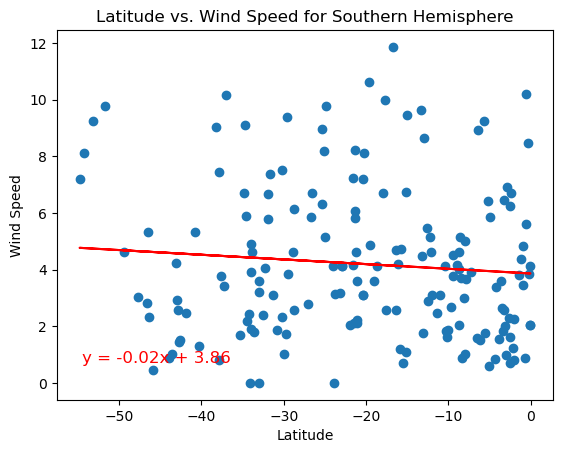

In [28]:
# Southern Hemisphere
regression_plot(southern_hemi_df,'Latitude','Wind Speed')

**Discussion about the linear relationship:** 
There is no correlation between 'Latitude' and 'Wind speed'
the r_value is less than 0.1, and it is abvious regardibg the distribution shown in the scatter-plot
this opens opportunities all over the world to have the 'right' wind speed if we want to navigate or make surf